# NumPy で行列を作る

## N 次元配列を作成する
NumPy では、ndarray クラスを用いて、多次元行列を作成することができます。以下コードでは、2×3 の 2 次元の行列を作成します。以下コード中の np.int32 は、配列の要素が 32 bit の整数であることを示しています。

In [4]:
import numpy as np

x = np.array([[1, 2, 3],[4, 5, 6]], np.int32)
print(x)

[[1 2 3]
 [4 5 6]]


## N 次元配列の型・サイズを確認する
作成した配列は以下のようにして、型やサイズ（大きさ）を確認できます。

2 x 3 行列を作成

In [7]:
x = np.array([[1, 2, 3],[4, 5, 6]], np.int32)

配列の型を確認

In [8]:
print(type(x)) 

<class 'numpy.ndarray'>


配列の要素の型を確認

In [9]:
print(x.dtype)

int32


配列のサイズを確認

In [10]:
print(x.shape)

(2, 3)


# NumPy で行列を操作する

## 配列の要素にアクセスする
他の言語と同じように添字をりようして値を取得できる。

In [11]:
x = np.array([[1, 2, 3],[4, 5, 6]], np.int32)

特定の要素の値を取得

In [14]:
print(x[1, 2])
print(x[1][2])

6
6


0行目のみを取得

In [15]:
print(x[0])

[1 2 3]


1行目のみを取得

In [16]:
print(x[1])

[4 5 6]


## 行列 (配列) の要素にアクセスする (インデックスを利用)

a[i:j] のように、: (コロン) で区切り、i 番目の要素 (開始地点) から j 番目の要素 (終了地点) までを切り出して新たな配列を作成できる。

In [17]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

2番目の要素から7番目の要素までを取得

In [18]:
print(x[2:7])

[2 3 4 5 6]


a[-N:M] のように、負の数 (マイナス) を使って、配列の後ろから数えて N 番目の要素の値、といった具合で指定することもできる。

後ろから 2 番目の要素から、前から 10 番目の要素までを取得

In [19]:
print(x[-2:10])

[8 9]


## 行列 (配列) の要素にアクセスする (数件飛ばしで取得する) 
a[i:j:k] のように、2 つの : (コロン) で区切り、i 番目の要素(開始地点)から j 番目の要素(終了地点)まで、k-1 つスキップしながら取得し、新たな配列を作成できる。

1 番目の要素から 7 番目の要素まで、1 つスキップしながら取得

In [22]:
print(x[1:7:2])

[1 3 5]


In [23]:
print(x[1:7:3])

[1 4]


## 行列 (配列) の要素にアクセスする (末尾から指定)

a[i:] のように、: (コロン) で区切ると、i 番目の要素から最後までの要素を全て抽出する。

5 番目の要素から最後の要素までを抽出

In [24]:
print(x[5:])

[5 6 7 8 9]


## 結合
 ・np.concatenate()  
  ２個以上の配列を軸指定して結合する  
　軸指定オプションのaxisはデフォルトが0  
　マスクは保存されない

vstack, r_はconcatenate(axis=0)と、hstack, c_はconcatenate(axis=1)と同等。

In [4]:
import numpy as np

arr1 = np.arange(6).reshape(2, 3)
arr2 = np.arange(6, 12).reshape(2, 3)

print(arr1)
print(arr2)

[[0 1 2]
 [3 4 5]]
[[ 6  7  8]
 [ 9 10 11]]


In [11]:
arr_v1 = np.concatenate((arr1, arr2), axis=0)
arr_v2 = np.vstack((arr1, arr2))
arr_v3 = np.r_[arr1, arr2]

print(arr_v1)
print(np.allclose(arr_v1, arr_v2, arr_v3))

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
True


In [13]:
arr_h1 = np.concatenate((arr1, arr2), axis=1)
arr_h2 = np.hstack((arr1, arr2))
arr_h3 = np.c_[arr1, arr2]

print(arr_h1)
print(np.allclose(arr_h1, arr_h2, arr_h3))

[[ 0  1  2  6  7  8]
 [ 3  4  5  9 10 11]]
True


・軸axisの指定はすでに存在している軸のみ。  
　(Join a sequence of arrays along an existing axis.)  
　1次元配列：axis=0  
　2次元配列：axis=0, axis=1  
　3次元配列：axis=0, axis=1, axis=2  
　N次元配列：axis=[0, N)　　0以上N未満

In [14]:
v1 = np.array([1, 2, 3])
v2 = np.array([4, 5, 6])

print(np.concatenate([v1, v2], axis=0))
print(np.concatenate([v1, v2], axis=1))

[1 2 3 4 5 6]


AxisError: axis 1 is out of bounds for array of dimension 1

・結合の方向にかかわらず、配列の次元が同じでないと結合できない。

In [15]:
a1 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]) # 2次元配列
a2 = np.array([10, 11, 12])                      # 1次元配列
print(np.concatenate([a1, a2], axis=0))

ValueError: all the input arrays must have same number of dimensions

行列(2次元配列)にベクトル(1次元配列)を結合させるとエラーだが、
ベクトルを2次元で表記すると結合できる。

In [20]:
a1 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
a2 = np.array([[10, 11, 12]])   # 2重の[[]]でベクトルを2次元で表記

print(np.concatenate([a1, a2], axis=0))
print(np.concatenate([a1, a2.T], axis=1))

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[[ 1  2  3 10]
 [ 4  5  6 11]
 [ 7  8  9 12]]


・ベクトル(1次元配列)を行列(2次元配列)に変換する方法

In [22]:
v1 = np.array([1, 2, 3])
print(v1.shape)
print(v1)

# ndim=1 のベクトルを ndim=2の横ベクトルに変換
v2 =np.reshape(v1, (1, v1.shape[0]))
print(v2.shape)  # (1, 3)
print(v2)        # [[1 2 3]]

# ndim=1 のベクトルを ndim=2の縦ベクトルに変換
v3 =np.reshape(v1, (v1.shape[0], 1))
print(v3.shape)  # (3, 1)
print(v3)

(3,)
[1 2 3]
(1, 3)
[[1 2 3]]
(3, 1)
[[1]
 [2]
 [3]]


・shapeが異なっていても結合できるが、結合方向は揃える。

In [23]:
a1 = np.array([[1, 2, 3], [4, 5, 6]])
a2 = np.array([[7, 8, 9], [10, 11, 12], [13, 14, 15]])

print(np.concatenate([a1, a2], axis=0))
print(np.concatenate([a1, a2], axis=1))

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]
 [13 14 15]]


ValueError: all the input array dimensions except for the concatenation axis must match exactly

## 分割
・np.split()  
  　第1引数：分割する配列  
  　第2引数（indices_or_sections）：  
    　　　整数値N : N等分に分割（割り切れない場合はエラー）  
    　　　配列 : 各値の位置で分割  
  　第3引数：分割する方向  
   

vsplitはsplit(axis=0)と、hsplitはsplit(axis=1)と同等。
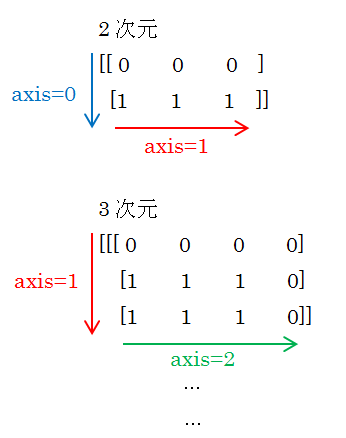

In [6]:
import numpy as np

arr = np.arange(12).reshape(3, 4)
print(arr)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [9]:
a, b = np.split(arr, 2, axis=1)
a1, b1 = np.hsplit(arr, 2)

print(a)
print(np.allclose(a,a1))

print(b)
print(np.allclose(b, b1))

[[0 1]
 [4 5]
 [8 9]]
True
[[ 2  3]
 [ 6  7]
 [10 11]]
True


In [ ]:
a, b, c = np.split(arr, [1, 3], axis=1)
a, b, c = np.hsplit(arr, [1, 3])

print a
# [[0]
#  [4]
#  [8]]

print b
# [[ 1  2]
#  [ 5  6]
#  [ 9 10]]

print c
# [[ 3]
#  [ 7]
#  [11]]

a, b = np.split(arr, [1], axis=0)
a, b = np.vsplit(arr, [1])

print a
# [[0 1 2 3]]

print b

# NumPyの軸(axis)と次元数(ndim)とは

NumPyのndarrayは、NumPy操作をするための多次元配列である。多次元の構造はndarray.shapeで確認することができる。

多次元構造を操作するために必須となるのが、軸(axis)を正しく理解する必要がある。多次元の配列構造を処理するために、NumPyの関数の引数には、axisを指定することが出来る場面が多々ある。

そのため、ここでは、

- 次元数とはなにか
- 軸(axis)とは何か
- 関数の引数としてaxisを指定すると何が起きているか

について解説する。

## ndarrayの次元数(ndim)とは何か

NumPyの多次元配列であるndarrayは、shapeでその構造を把握することができる。

In [1]:
import numpy as np

a = np.array([[1, 2, 3], [4, 5, 6]])
a.shape

(2, 3)

上記のコードの場合、shapeを見ると2×3の構造をしていることが分かる。

In [5]:
a.ndim

2

ndimは多次元配列が何次元の構造をしているのかを意味している。つまり、shapeの要素の数なのでlen(arr.shape)ということになる

# NumPy で数学系の関数を使う

## 三角関数

・ 正弦関数 (sin(x), サイン)　：np.sin(x)  
・ 余弦関数 (cos(x), コサイン)　：np.cos(x)  
・ 正接関数 (tan(x), タンジェント)　：np.tan(x)  

x はラジアンで指定する必要があるため、度はラジアンに変換する必要がある。

度からラジアンへ (np.radians)

In [28]:
print(np.sin(0))
print(np.sin([0, 1]))

print(np.cos(1))
print(np.cos([0, 1]))
 
print(np.tan(1))
print(np.tan([0, 1]))

0.0
[ 0.          0.84147098]
0.540302305868
[ 1.          0.54030231]
1.55740772465
[ 0.          1.55740772]


Matplotlib を利用して、サインカーブを出力することもできる。

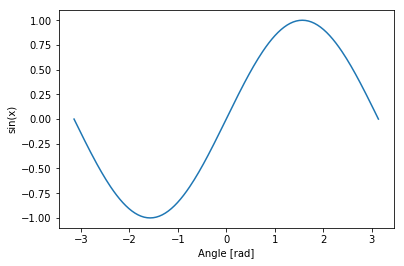

In [29]:
import matplotlib.pylab as plt

x = np.linspace(-np.pi, np.pi, 201)
plt.plot(x, np.sin(x))
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

## 逆三角関数

    ・ 逆正弦関数 (asin(x), アークサイン)　：np.arcsin(x)  
    ・ 逆余弦関数 (acos(x), アークコサイン)　：np.arccos(x)  
    ・ 逆正接関数 (atan(x), アークタンジェント)　：np.arctan(x) 

In [33]:
print(np.arcsin(1))
print(np.arcsin([-1, 0, 1]))

print(np.arccos(1))
print(np.arccos([-1, 0, 1]))
 
print(np.arctan(1))
print(np.arctan([-1, 0, 1]))

1.57079632679
[-1.57079633  0.          1.57079633]
0.0
[ 3.14159265  1.57079633  0.        ]
0.785398163397
[-0.78539816  0.          0.78539816]


## ラジアン ⇔ 度 の変換

NumPy では、np.radians(x), np.deg2rad(x), np.rad2deg(x) 関数で、  
弧度法(rad)と度数法 (°) を変換する。  
なお、np.radians(x), np.deg2rad(x) の 2 つの関数は同じ結果を返す。

In [35]:
# 度からラジアンへ (np.radians)
print(np.radians(0))
print(np.radians([np.rad2deg(1), 0, 90]))
 
# 度からラジアンへ (np.deg2rad)
print(np.deg2rad(0))
print(np.deg2rad([np.rad2deg(1), 0, 90]))
 
# ラジアンから度へ
print(np.rad2deg(0))
print(np.rad2deg([np.deg2rad(180), 1, 0.5]))

0.0
[ 1.          0.          1.57079633]
0.0
[ 1.          0.          1.57079633]
0.0
[ 180.           57.29577951   28.64788976]


## 指数関数、対数関数

NumPy には、指数関数として、e(x) を計算する np.exp() があります。

In [37]:
print(np.exp(0))
print(np.exp(1))

1.0
2.71828182846


NumPy には、対数関数として以下が定義されています。

    ・e が底 (Log_e(x)) の np.log(x)
    ・2 が底（Log_2(x)）の np.log2(x)
    ・10 が底（Log_10(x)）の np.log10(x)

なお、定数 e は、np.e として定義されています。

In [38]:
# e を出力
print(np.e)
 
# eが底の指数関数 (Log_e(x))
print(np.log(1))
print(np.log([1, np.e, np.e ** 2, 0]))
 
# 2が底の指数関数 (Log_2(x))
print(np.log2(2))
print(np.log2([1, np.e, np.e ** 2, 0]))
 
# 10 が底の指数関数 (Log_10(x))
print(np.log10(1000))
print(np.log10(1e+10))  # 1e+10 = 10,000,000,000

2.718281828459045
0.0
[  0.   1.   2. -inf]
1.0
[ 0.          1.44269504  2.88539008        -inf]
3.0
10.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log2
  # Remove the CWD from sys.path while we load stuff.


## 剰余

NumPy で剰余 (割り算の余り) を求めるには、np.mod()があります。

In [40]:
# 配列 [1, 2, 3, 4, 5, 6] の各要素に対する 3 の剰余
np.mod([1, 2, 3, 4, 5, 6], 3)

array([1, 2, 0, 1, 2, 0], dtype=int32)

なお、配列を用いない場合は、NumPy を利用せず、Python の関数のみで実現可能です。


In [41]:
5 % 3 # 5 / 3 = 1 余り 2

2

## 四捨五入、切捨て、切り上げ
小数を整数に変換する方法としては、いくつかの方法があります。

    ・四捨五入 np.round()
    ・切り捨て np.trunc()
    ・切り捨て np.floor()
    ・切り上げ np.ceil()
    ・ゼロに近いほうに丸める np.fix()
